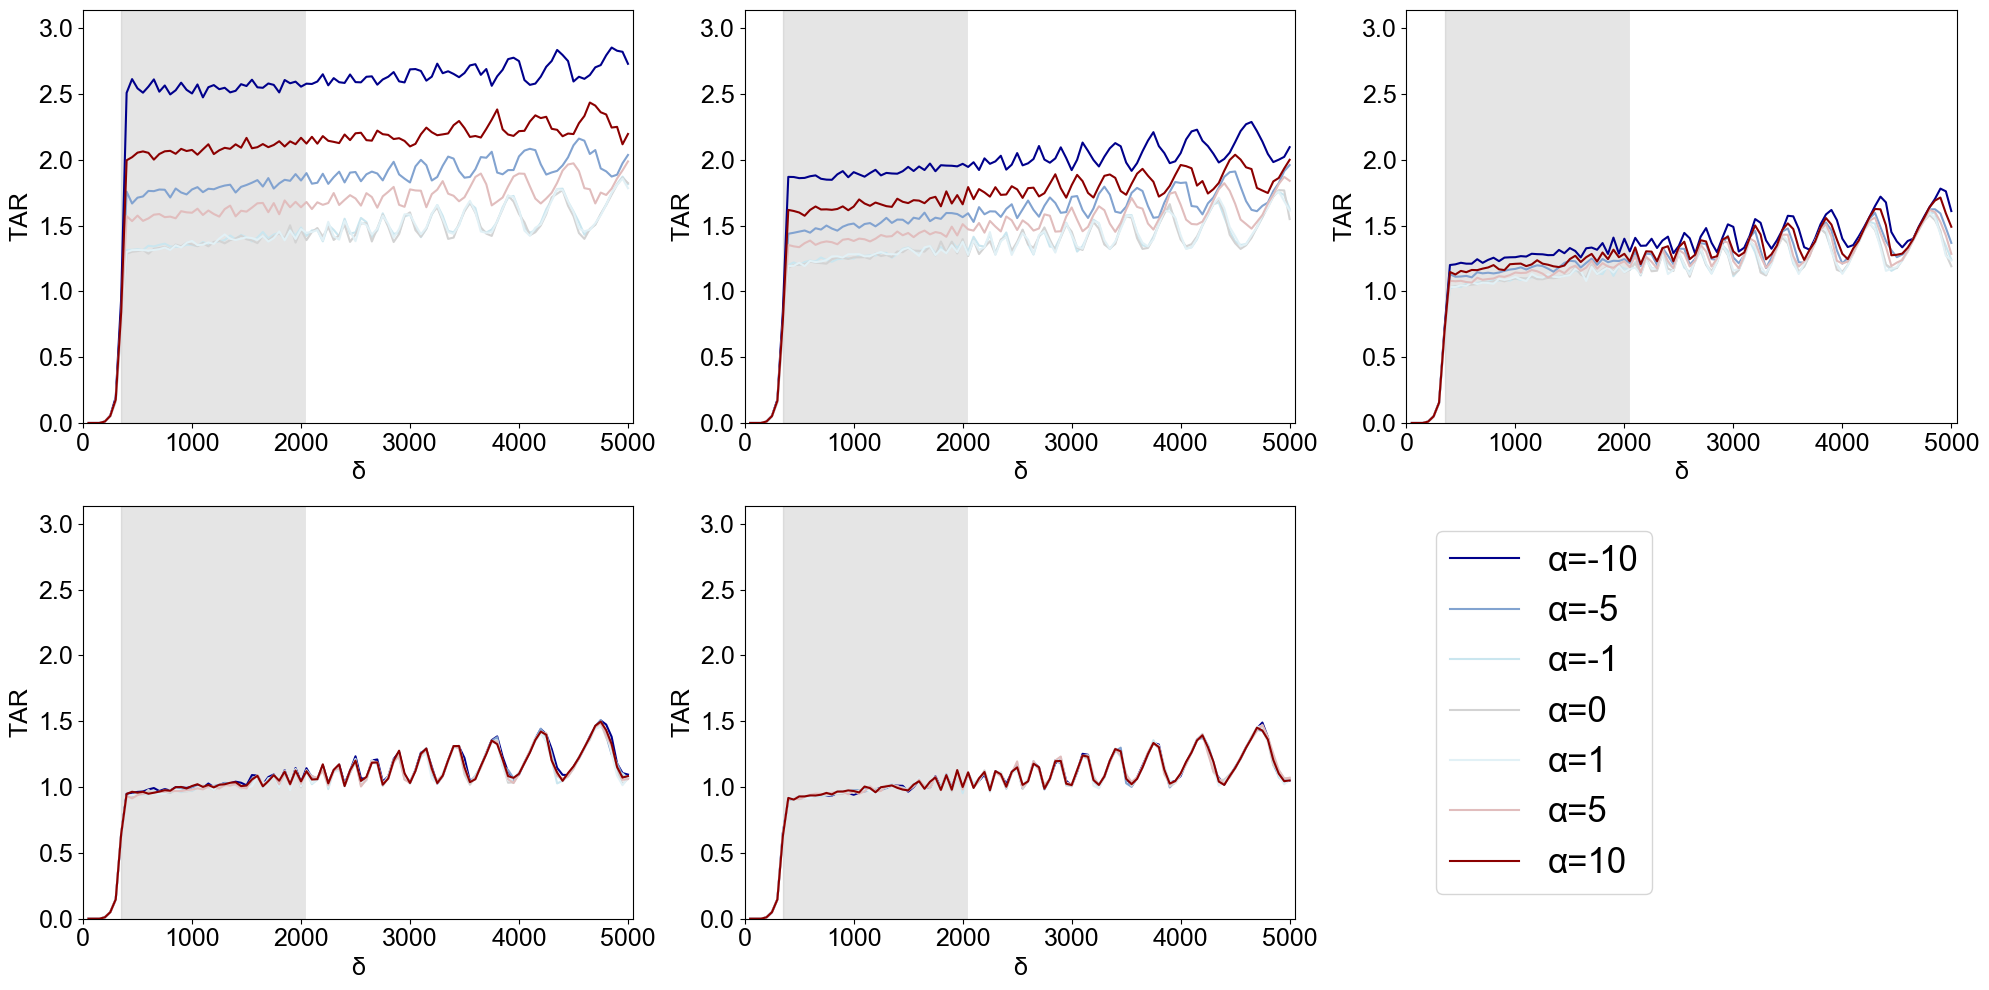

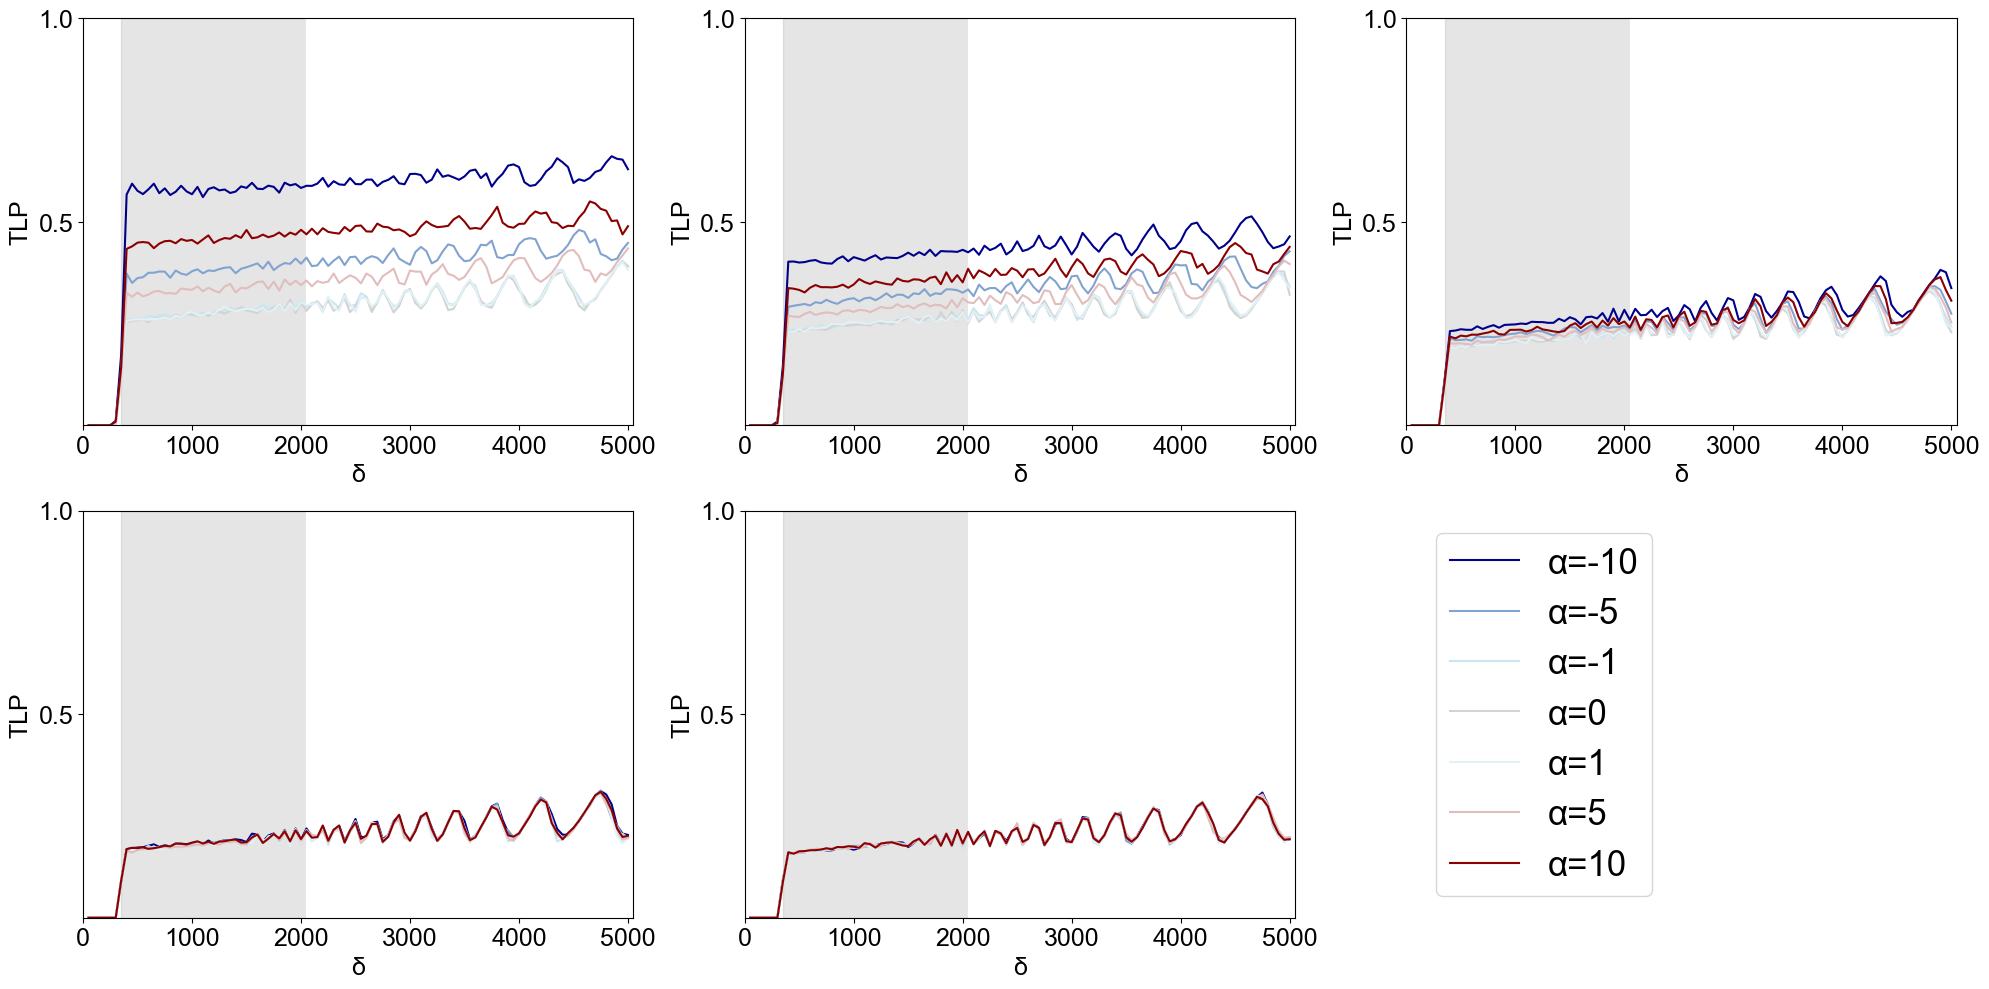

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 设置合适的字体以支持中文显示
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft YaHei', 'SimHei', 'sans-serif']

# 读取CSV文件
df = pd.read_csv(r'D:\VS code\project\Fig02-06\simulation_results\Fig03_result.csv')

# 计算每个参数组合的均值
mean_df = df.groupby(['q', 'alpha', 'delta']).mean().reset_index()

# 参数范围
p_values = np.arange(100, 5050, 50)
q_values = [0, 0.15, 0.5, 0.85, 1]
alpha_values = [-10, -5, -1, 0, 1, 5, 10]

# 创建自定义颜色映射
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#00008B', '#ADD8E6', '#FFFFFF', '#8B0000'], N=256)

# 绘制图表函数
def plot_metric(ax, metric, q_val):
    lines = []
    labels = []
    for alpha in alpha_values:
        subset = mean_df[(mean_df['q'] == q_val) & (mean_df['alpha'] == alpha)]
        subset = subset.sort_values(by='delta')
        # 颜色映射到自定义颜色映射
        if alpha == 0:
            color = '#D3D3D3'  # 使用灰白色
        else:
            color = cmap((alpha + 10) / 20)
        line, = ax.plot(subset['delta'], subset[metric], label=f'α={alpha}', color=color)
        lines.append(line)
        labels.append(f'α={alpha}')
    
    ax.set_xlabel('δ', fontsize=18)
    ax.set_ylabel(metric, fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.grid(False)
    ax.set_xlim(0, 5050)
    ax.set_ylim(0, mean_df[metric].max() * 1.1)

    # 设置不同区域的背景颜色
    ax.axvspan(0, 350, color='white', alpha=1)  
    ax.axvspan(350, 2050, color='gray', alpha=0.2) 
    ax.axvspan(2050, 5000, color='white', alpha=1) 

    return lines, labels

# 创建 TAR 子图布局
fig_tar, axs_tar = plt.subplots(2, 3, figsize=(20, 10))
axs_tar = axs_tar.flatten()

# 绘制 TAR 图表
lines, labels = None, None
for i, q in enumerate(q_values):
    lines, labels = plot_metric(axs_tar[i], 'TAR', q)
    axs_tar[i].tick_params(axis='both', labelsize=18)  # 设置TAR图的刻度字体大小

# 在最后一个子图上添加图例
axs_tar[-1].legend(lines, labels, loc='center', bbox_to_anchor=(0.25, 0.5), fontsize=25)
axs_tar[-1].axis('off')  # 隐藏最后一个子图的坐标轴，但用于放置图例
fig_tar.tight_layout()

# 保存为PDF格式
fig_tar.savefig(r'D:\VS code\project\Fig02-06\Fig03.pdf', format='pdf')

# 创建 TLP 子图布局
fig_tlp, axs_tlp = plt.subplots(2, 3, figsize=(20, 10))
axs_tlp = axs_tlp.flatten()

# 绘制 TLP 图表
lines, labels = None, None
for i, q in enumerate(q_values):
    lines, labels = plot_metric(axs_tlp[i], 'TLP', q)
    axs_tlp[i].set_yticks([0.5, 1.0])  
    axs_tlp[i].tick_params(axis='both', labelsize=18)  # 设置TLP图的刻度字体大小

# 在最后一个子图上添加图例
axs_tlp[-1].legend(lines, labels, loc='center', bbox_to_anchor=(0.25, 0.5), fontsize=25)
axs_tlp[-1].axis('off')  # 隐藏最后一个子图的坐标轴，但用于放置图例
fig_tlp.tight_layout()

# 保存为PDF格式
fig_tlp.savefig(r'D:\VS code\project\Fig02-06\Fig04.pdf', format='pdf')

# 显示图表
plt.show()


从图来看，TAR和TLP具有相同的变化趋势，将其分为两个阶段，（i）无损失患者期，即TLP=0；随着每日新增患者数δ的增大，增大至阈值点δ_c，进入（ii）波动期，即TAR和TLP迅速增大，其次缓慢上升，最后δ越来越大，两者发生周期性波动。
参数q和α的影响：（a）图当q=0时，（i）无损失患者期中不同α值的曲线高度重合，（ii）波动期中，α=-10的曲线最高，其次是α=10，最低是α=-1，0，1这三条曲线，它们高度重合；随着q值的增大，不同α值的变化曲线逐渐重合，并且TLP和TAR值也相对减少。

讨论：参数q表示完全随机转诊概率，即不遵循网络结构转诊的程度；参数α表示遵循网络结构下的权重偏好，因此q值越大，即网络结构对转诊影响越弱，图中线条逐渐收敛。
如果所有患者都随机选择医生转诊，则网络结构对转诊的影响可忽略。

